In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
z = -1 * x + np.random.randn(10)
X = np.vstack((x,y,z))

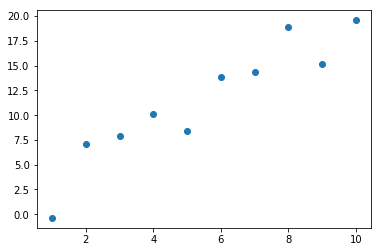

In [3]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [4]:
def covariance(x, y):
  return np.mean((x-np.mean(x))*(y-np.mean(y)))

In [5]:
np.sqrt(covariance(x, y))

3.9276129053499194

In [6]:
np.std(y)

5.7512036981830779

In [7]:
def normalize(X):
  if X.shape[0] > 1:
    return [x-np.mean(x) for x in X]
  else:
    return X - np.mean(X)

In [8]:
Xcentered = normalize(X)

In [9]:
covmat = np.cov(X)

In [10]:
print(covmat)
print("Variance of X: ", np.cov(Xcentered)[0,0])
print("Variance of Y: ", np.cov(Xcentered)[1,1])
print("Covariance X and Y: ", np.cov(Xcentered)[0,1])

[[  9.16666667  17.14015904  -8.40393316]
 [ 17.14015904  36.75149331 -15.90145427]
 [ -8.40393316 -15.90145427   9.03313319]]
Variance of X:  9.16666666667
Variance of Y:  36.7514933089
Covariance X and Y:  17.1401590381


In [11]:
X = X.T

In [12]:
eigs = np.linalg.eig(covmat)
eigs

(array([ 52.40738308,   0.54299093,   2.00091915]),
 array([[-0.40376822, -0.84943634, -0.33974863],
        [-0.83090184,  0.18507979,  0.52473575],
        [ 0.38284901, -0.49416939,  0.78052755]]))

In [13]:
plt.figure()
plt.scatter(normalize(X)[0], normalize(X)[1])
plt.quiver([0, 0], [0, 0], vex, vey, angles='xy', scale_units='xy', scale=1)

# plt.xlim(-20, 20)
# plt.ylim(-20, 20)
plt.show()

NameError: name 'vex' is not defined

In [14]:
eigs

(array([ 52.40738308,   0.54299093,   2.00091915]),
 array([[-0.40376822, -0.84943634, -0.33974863],
        [-0.83090184,  0.18507979,  0.52473575],
        [ 0.38284901, -0.49416939,  0.78052755]]))

In [15]:
_, vecs = np.linalg.eig(covmat)
v = -vecs[:,1]
Xnew = np.dot(v,Xcentered)
print(Xnew)

[ 0.22299582 -0.59630702 -0.098476   -0.7461567   1.05642196  0.26178008
 -0.05757154 -1.17716734 -0.02354089  1.15802164]


In [16]:
v = [vecs[:, 1], vecs[:, 0]]

In [17]:
def PCA(X, n_components=1):
  def normalize(X):
    return [x-np.mean(x) for x in X]
  
  Xcentered = normalize(X)
  covmat = np.cov(X)
  eigvals, vecs = np.linalg.eig(covmat)
  if n_components == 1:
    v = vecs[:, np.argmax(eigvals)]
    return np.dot(v, Xcentered)
  else:
    import heapq
    n_best = heapq.nlargest(n_components, range(len(eigvals)), eigvals.__getitem__)
    PCs = []
    for i in n_best:
      v = vecs[:, i]
      PCs.append(np.dot(v, Xcentered))
    return np.array(PCs)

In [18]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
#z = -3 * x + np.random.randn(10)*2
X = np.vstack((x,y))

In [19]:
PCA(X, 2)

array([[ 7.1096994 ,  6.94324625,  4.8805045 ,  4.7701115 ,  1.39854686,
        -3.01394657, -1.5655472 , -2.6712201 , -9.35495106, -8.49644358],
       [ 1.2046431 ,  0.15358915,  0.15346484, -0.92865785, -0.20342803,
         1.09868809, -0.84732267, -1.37785783,  1.18298593, -0.43610473]])

In [70]:
XPCAreduced

array([[-7.1096994 ],
       [-6.94324625],
       [-4.8805045 ],
       [-4.7701115 ],
       [-1.39854686],
       [ 3.01394657],
       [ 1.5655472 ],
       [ 2.6712201 ],
       [ 9.35495106],
       [ 8.49644358]])

In [21]:
from sklearn.decomposition import PCA as PCA_sklearn
pca = PCA_sklearn(n_components = 1)
XPCAreduced = pca.fit_transform(X.T)

In [22]:
import csv

from sklearn.model_selection import train_test_split
blood = []
with open("blood/transfusion.data", 'r') as fn:
  raw_blood = csv.reader(fn, delimiter = ',')
  for line in raw_blood:
    blood.append(line)

In [23]:
b_labels = blood[0]
b_data = blood[1:]
b_target = np.array([i[-1] for i in b_data])
b_target = b_target.astype(np.float32)
b_data = np.array([i[:-1] for i in b_data])
b_data = b_data.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(
    b_data, b_target, test_size=0.1, random_state=0)

In [24]:
pca = PCA(b_data.T, n_components=2)

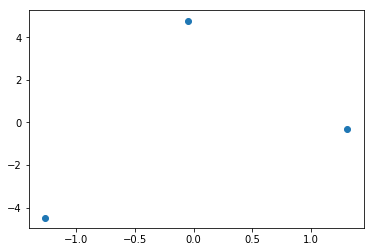

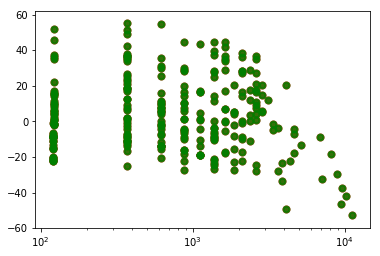

In [25]:
# Visualize
plt.figure()
plt.xscale('log')
colors = ['red', 'green']
lw = 2

for color, i, target_name in zip(colors, [0, 1], ["Yes", "No"]):
  plt.scatter(pca[0], pca[1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.show()

In [26]:
pca

array([[ 11121.46451074,   1871.17531102,   2621.21197312, ...,
          -628.36563944,  -1128.60136357,  -1128.28487987],
       [   -52.67169444,    -27.06312643,    -27.68703756, ...,
            36.12445205,     21.47481748,     59.82998194]])

In [27]:
import pandas as pd

In [28]:
df = pd.DataFrame({'a':[1, 2, 3, 4], 'b':[13,6, 6, 7]})

In [29]:
df.loc[df['a'].notnull(), 'a'].loc[1]

2

In [35]:
b_data.shape

(748, 4)

# On Titanic Dataset

In [36]:
titanic = pd.read_csv('titanic.csv')

In [42]:
#data preprocessing
titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].mean())
titanic["Embarked"] = titanic["Embarked"].fillna("S")

titanic["Age"] = titanic["Age"].fillna(-0.5)

In [43]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Most of features are categorial, no use of PCA

# Breast cancer

In [82]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.target[[10, 50, 85]]

list(data)


['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [96]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [101]:
breast_reduced = PCA(data.data.T, 2)

In [100]:
len(breast_reduced)

20

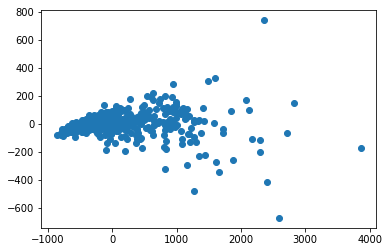

In [103]:
plt.figure()
plt.scatter(breast_reduced[0], breast_reduced[1])
plt.show()

Same method from sklearn

In [104]:
from sklearn.decomposition import PCA as PCA_sklearn

In [105]:
sklearn_pca = PCA_sklearn(n_components = 2)
breast_sklearn = sklearn_pca.fit_transform(data.data).T

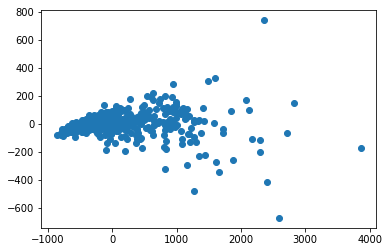

In [106]:
plt.figure()
plt.scatter(breast_sklearn[0], breast_sklearn[1])
plt.show()

# Self-organising map

In [1]:
print()